Import Libraries

In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt, seaborn as sns, numpy as np

Membaca Seluruh File

In [52]:


files = [file for file in os.listdir("D:\DATA_ANALYST\Sales_Product_Data\dataset")]

all_months_data = pd.DataFrame()

# Join the datas
for file in files:
    df = pd.read_csv("D:/DATA_ANALYST/Sales_Product_Data/dataset/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

# Read All data
all_data = pd.read_csv("all_data.csv")
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Business Understanding

#### Target
A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

#### Task:
- Q: What was the best month for sales? How much was earned that month?
- Q: What City had the highest number of sales?
- Q: What time should we display adverstisement to maximize likelihood of customer's buying product?
- Q: What products are most often sold together?
- Q: What product sold the most? Why do you think it sold the most?

#### How Much Probability?
- How much probability for next people will ordered USB-C Charging Cable?
- How much probability for next people will ordered iPhone?
- How much probability for next people will ordered Google Phone?
- How much probability other peoples will ordered Wired Headphones?

### Data Understanding

- Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
- Product - The product that have been sold.
- Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
- Price Each - The price of each products.
- Order Date - This is the date the customer is requesting the order be shipped.
- Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

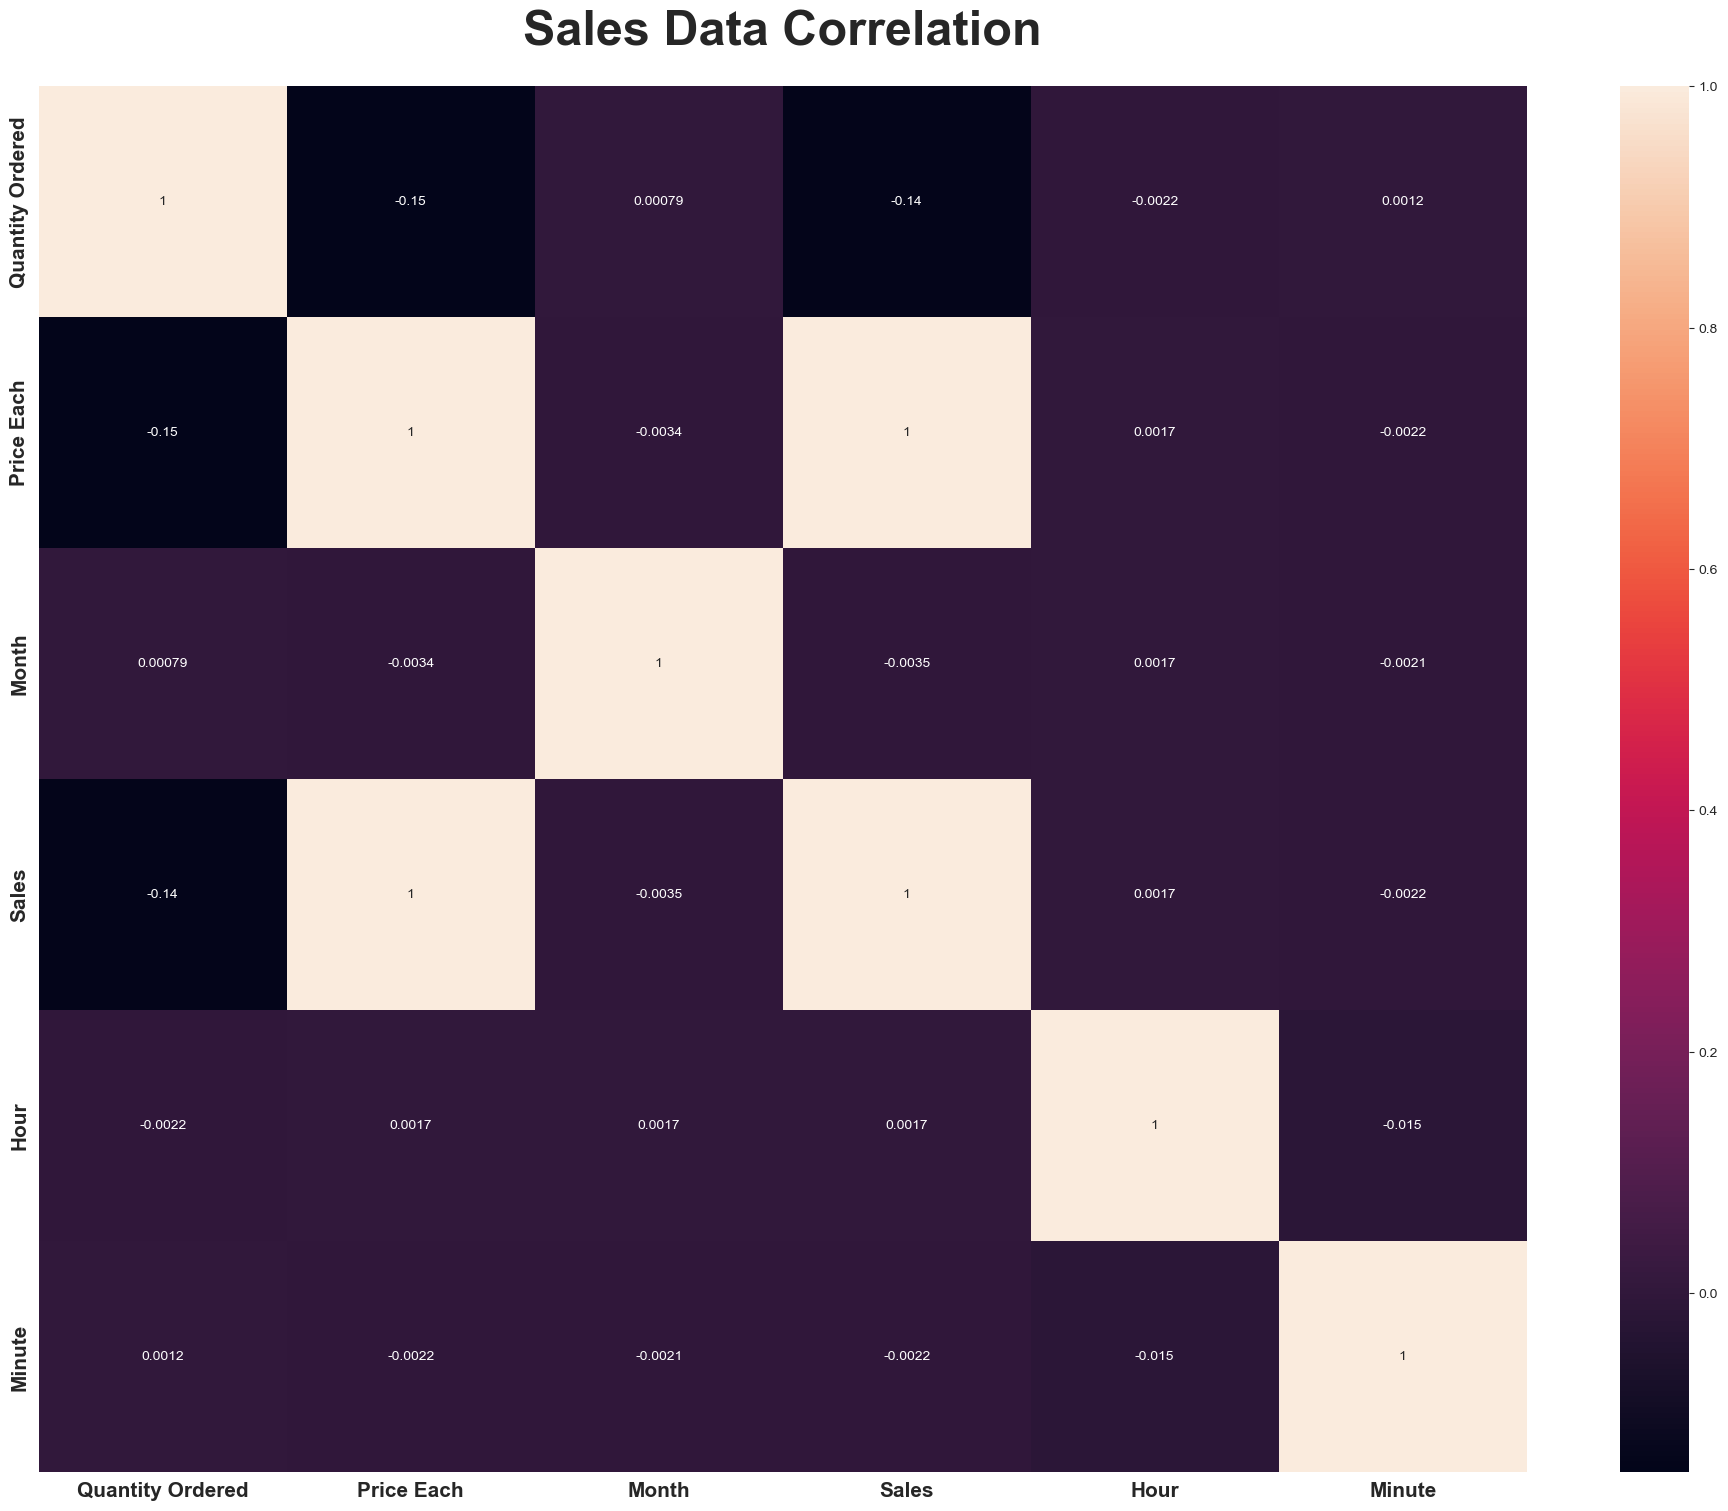

In [141]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(all_data.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

### Data Preparation

Remove Nan

In [53]:
print(all_data.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [54]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


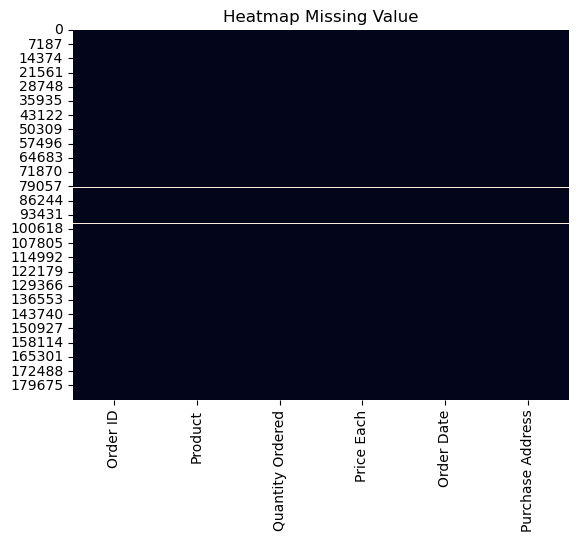

In [55]:

sns.heatmap(all_data.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Drop Missing Value

In [56]:
all_data = all_data.dropna(how='all')
all_data = all_data.reset_index(drop=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Mencari 'Or' dan menghapusnya

In [57]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Mengganti Data type

In [58]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Menambahkan column tambahan

Menambahkan column bulan

In [59]:
all_data["Month"] = all_data['Order Date'].str[0:2]

# Mengubah kolom month ke numerical
all_data["Month"] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Menambahkan cloumn sales

In [60]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Menambahkan column Kota dari column Alamat


In [79]:
def get_city(address):
    return address.split(',')[1]

def get_state(states):
    return states.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### EDA

- Q: What was the best month for sales? How much was earned that month?

In [65]:
results1 = all_data.groupby('Month').sum()

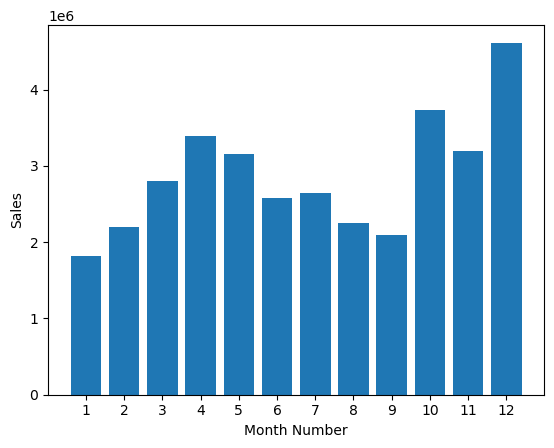

In [123]:
months = range(1,13)


plt.bar(months, results1['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.show()

- Q: What City had the highest number of sales?

In [81]:
results2 = all_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


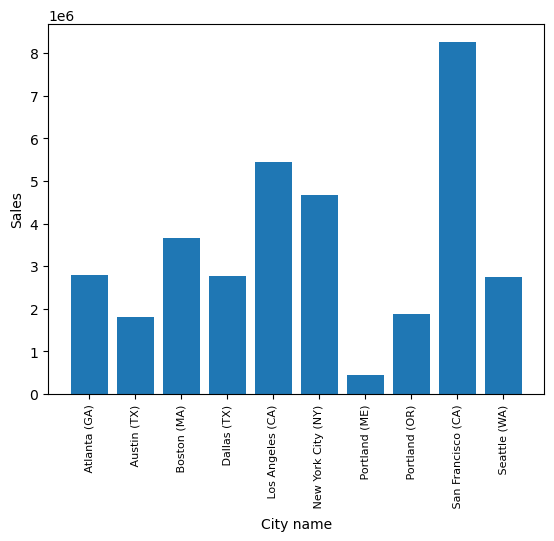

In [83]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('City name')
plt.show()

- Q: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [84]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [87]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


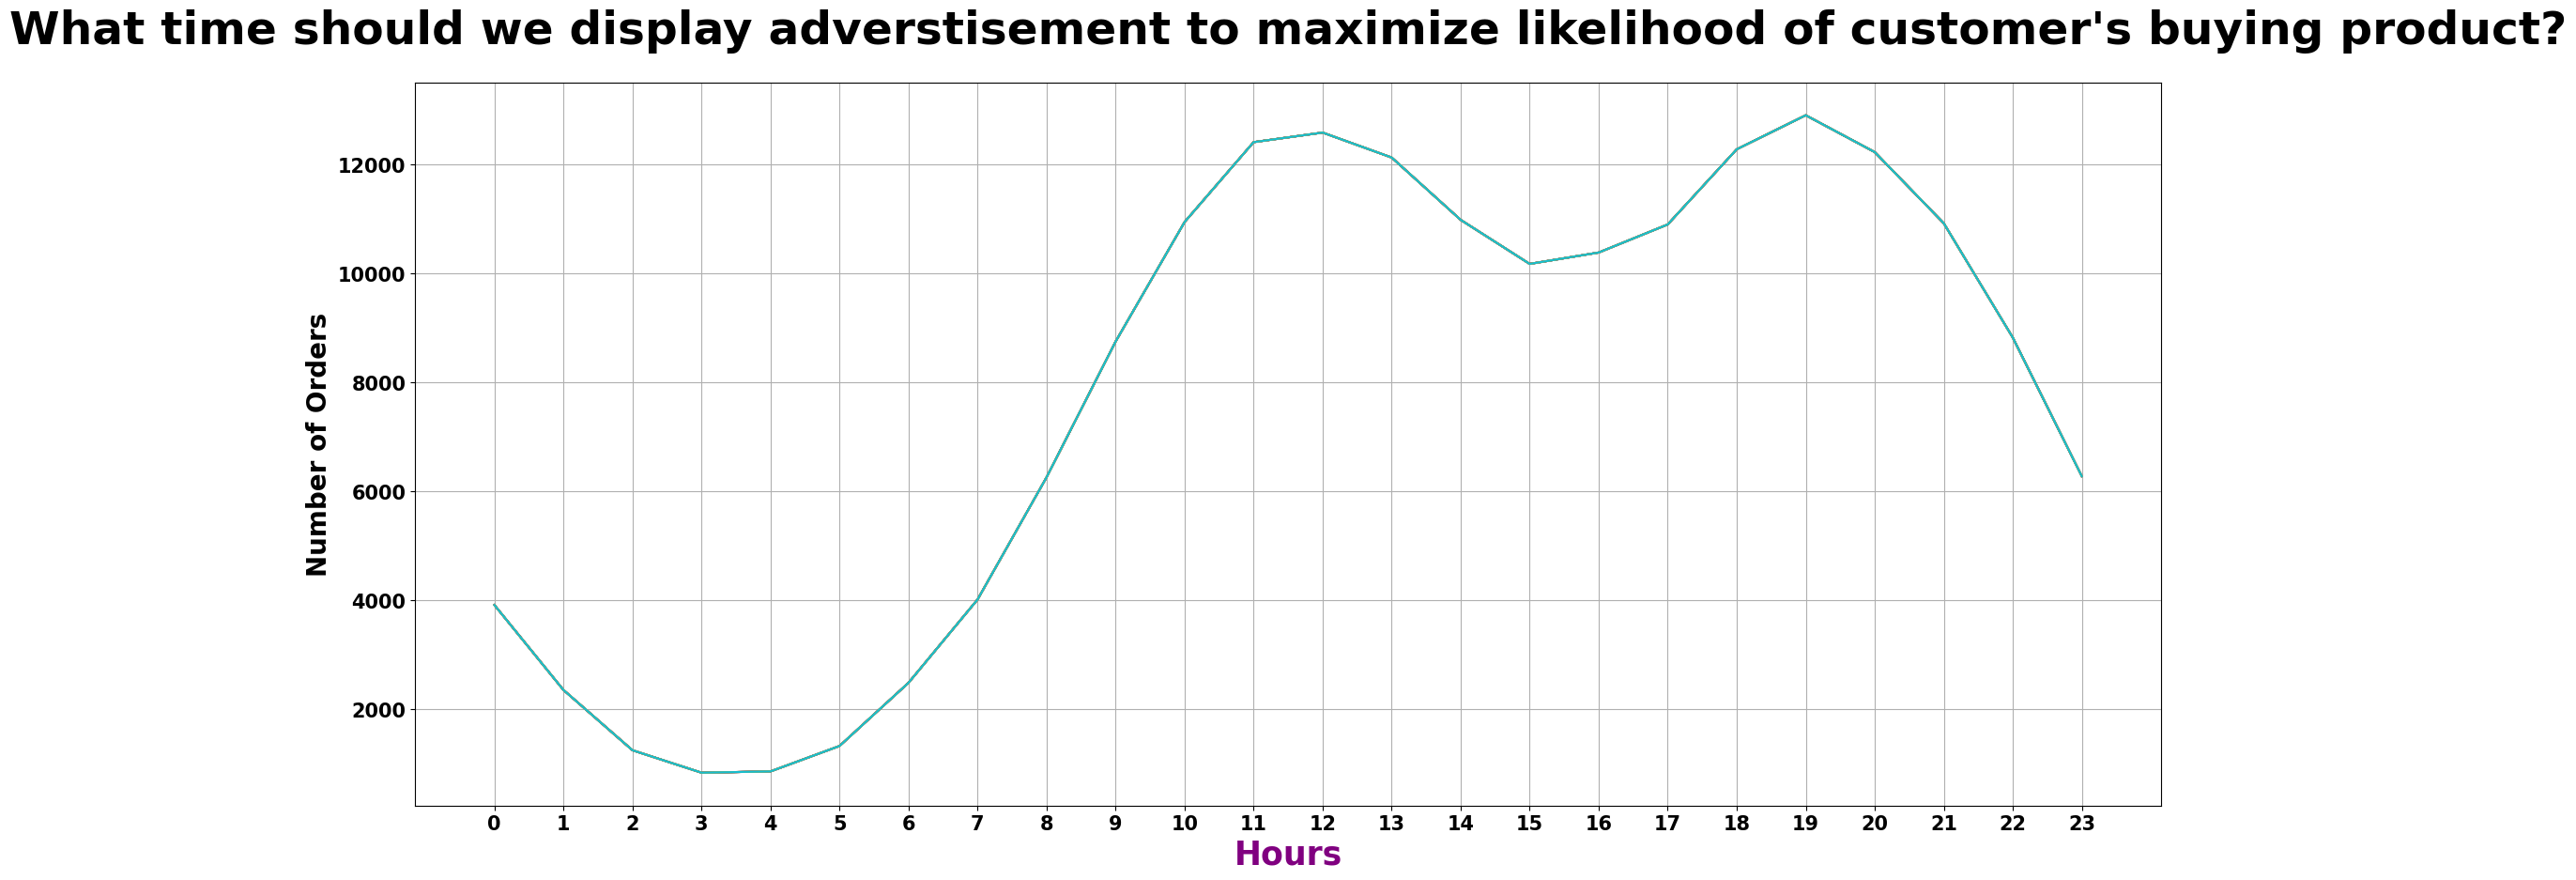

In [128]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(24, 10)) # figuring the size
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30)

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel( # x-label
    "Hours", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);
plt.grid()
plt.show()

- Q: What products are most often sold together?

In [98]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: 'x'.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

df.head(10)

C:\Users\Muhammad Khairul\AppData\Local\Temp\ipykernel_26720\3918631646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: 'x'.join(x))


,Order ID,Grouped
2,176560,Google PhonexWired Headphones
17,176574,Google PhonexUSB-C Charging Cable
29,176585,Bose SoundSport HeadphonesxBose SoundSport Hea...
31,176586,AAA Batteries (4-pack)xGoogle Phone
118,176672,Lightning Charging CablexUSB-C Charging Cable
128,176681,Apple Airpods HeadphonesxThinkPad Laptop
137,176689,Bose SoundSport HeadphonesxAAA Batteries (4-pack)
188,176739,34in Ultrawide MonitorxGoogle Phone
224,176774,Lightning Charging CablexUSB-C Charging Cable
232,176781,iPhonexLightning Charging Cable


In [131]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = all_data[all_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\Muhammad Khairul\AppData\Local\Temp\ipykernel_26720\408552703.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  1005
  orders, and Google Phone, USB-C Charging Cable ranked second with  987
  orders.

### - Q: What product sold the most?

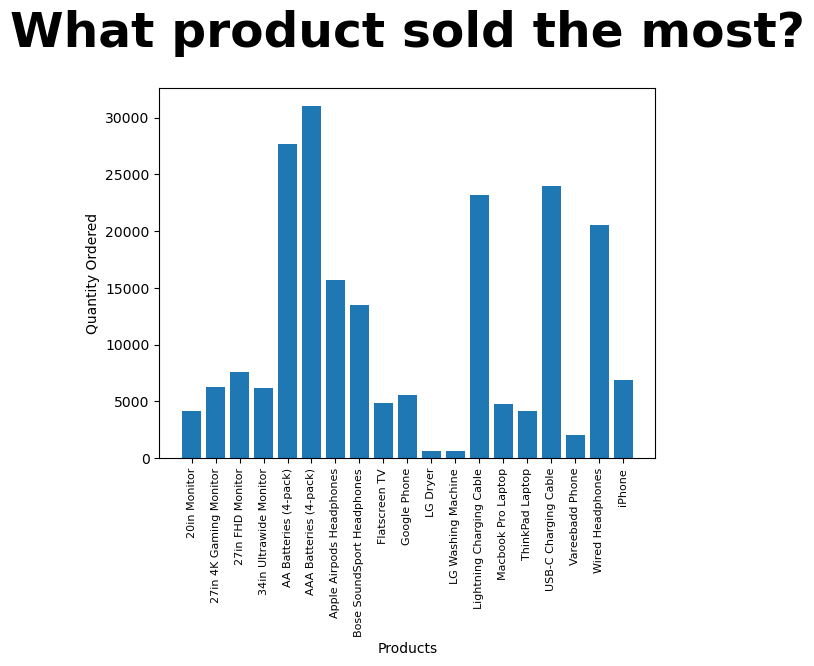

In [119]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.title( # title
    "What product sold the most?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30) # padding
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

C:\Users\Muhammad Khairul\AppData\Local\Temp\ipykernel_26720\1845431745.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels( # x-ticks
c:\Users\Muhammad Khairul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


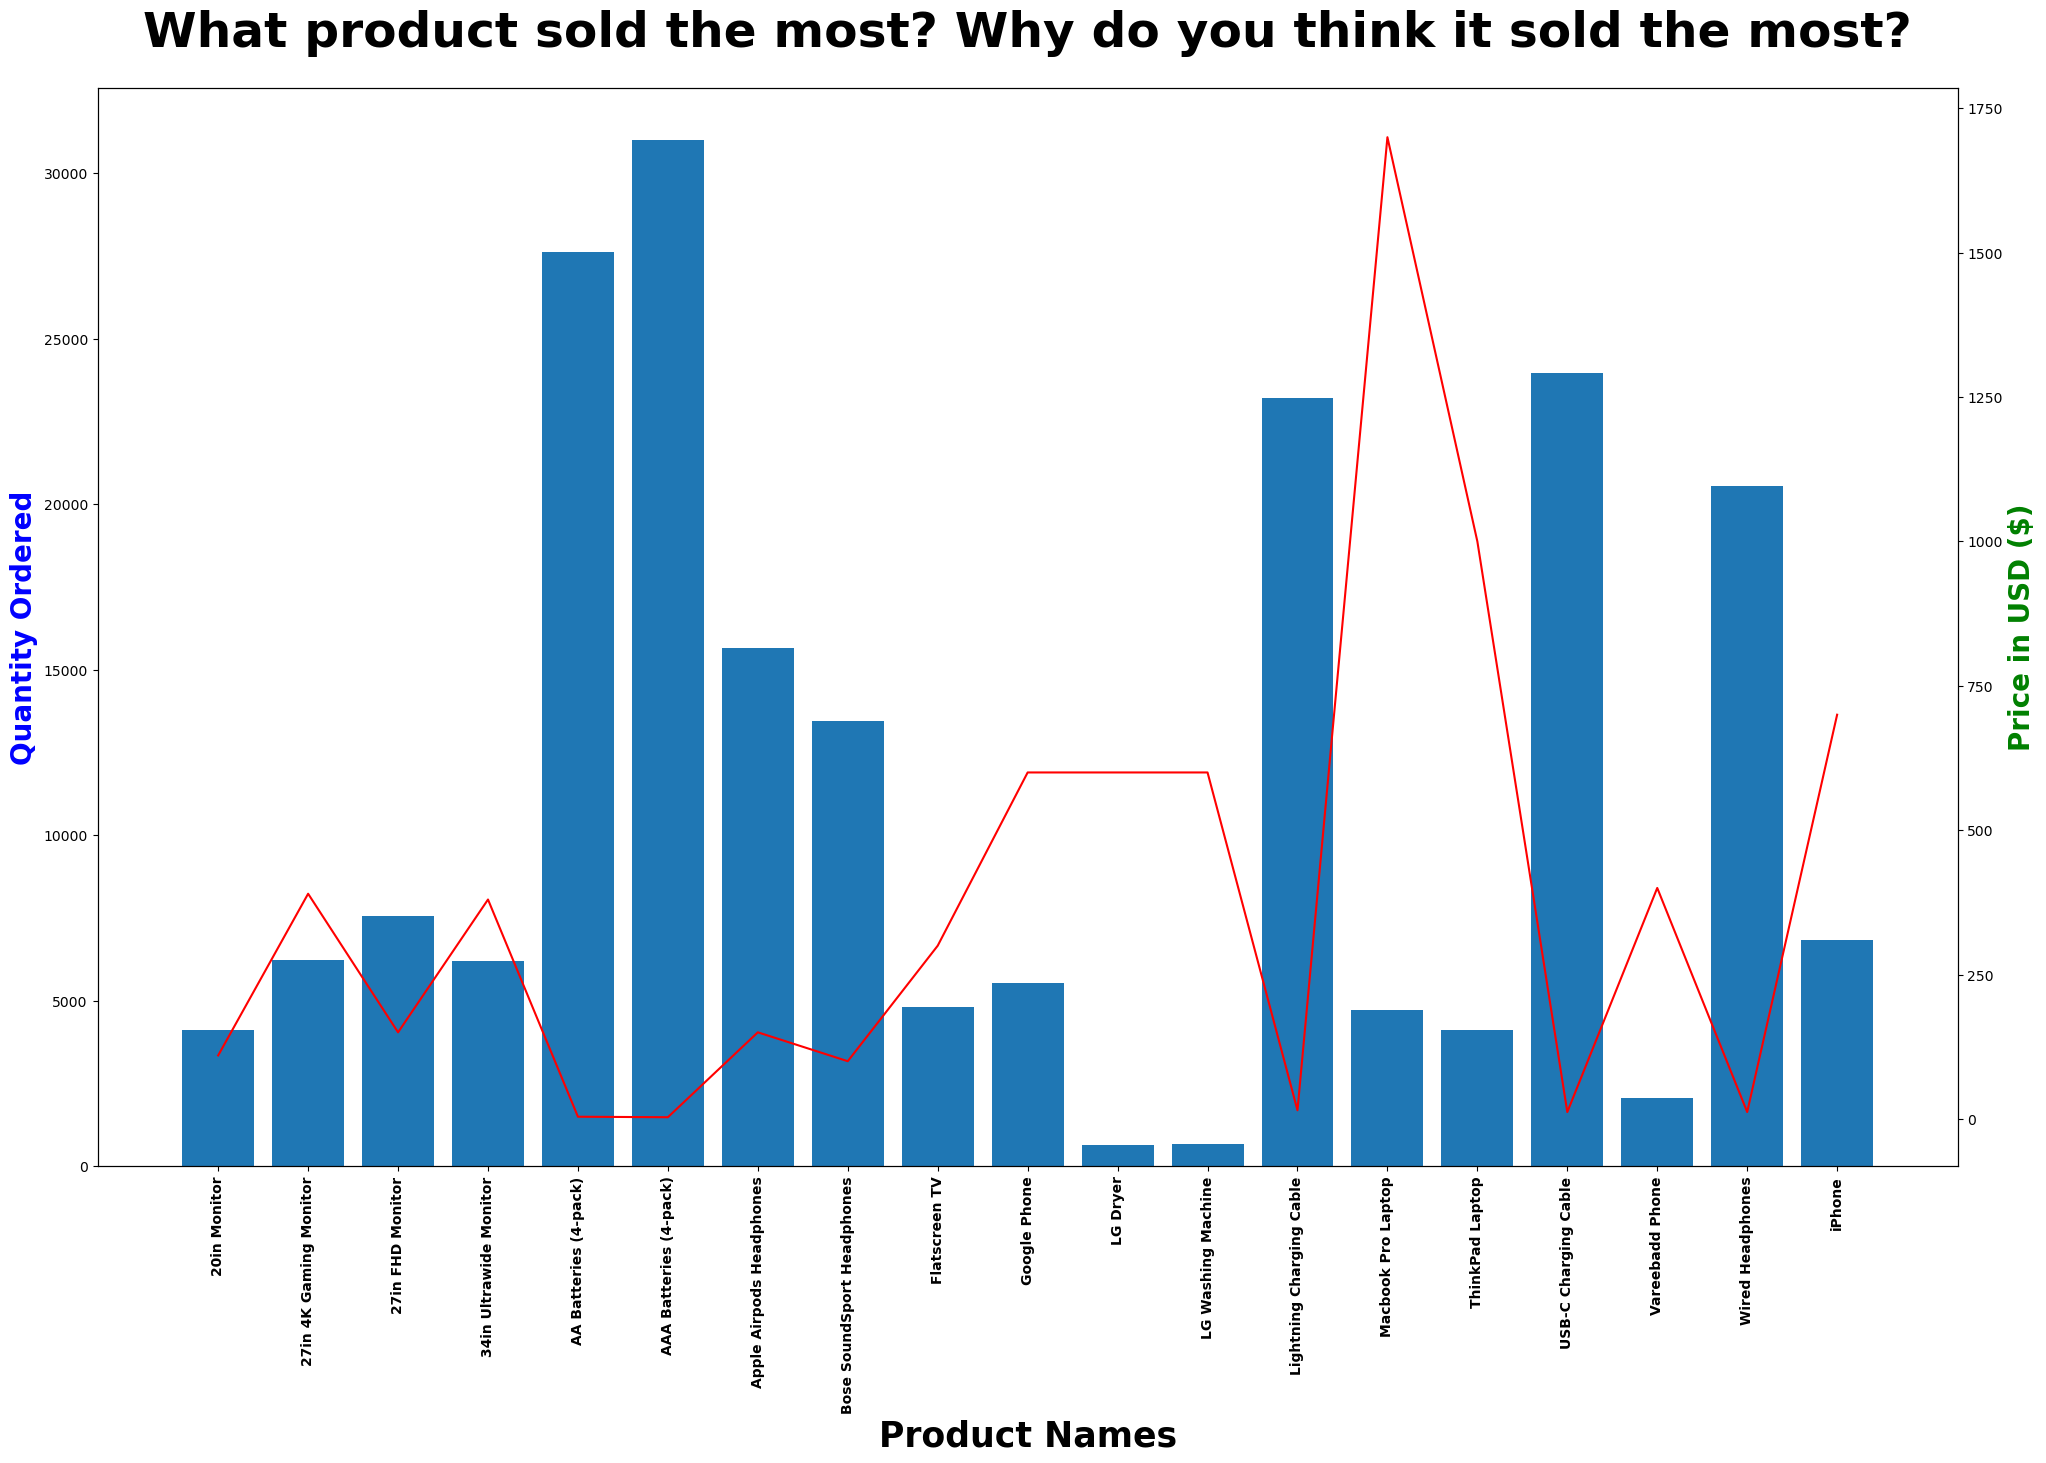

In [140]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(24, 14))
ax1.set_title( # title
    "What product sold the most? Why do you think it sold the most?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "What product sold the most? Why do you think it sold the most?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered", 
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation 
    weight="bold" # weight
)
# AXES 2
sns.lineplot( # plot
    products, # x-axis
    prices, # y-axis
    color="red"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)", 
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

plt.show()

The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products have a low price compared to other products, for example, the LG Dryer, or the LG Washing Machine, which have a price of around  $500−700
 .

### Modelling

How much probability for next people will order USB-C Charging Cable?

In [133]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = all_data.Product.value_counts().sum() 

In [134]:
usb_charging = all_data[all_data.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


    The probability for next people will order USB-C Charging Cable is  12%, Because there are only 12%   chance we can say this an unusual event.

How much probability for next people will order iPhone?

In [135]:
iphone = all_data[all_data.Product == 'iPhone'].value_counts().sum()
# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


    The probability for next people will order iPhone is  4%, Because there are only  4%, chance we can say this an unusual event.

How much probability for next people will order Google Phone?

In [136]:
google_phone = all_data[all_data.Product == 'Google Phone'].value_counts().sum()
# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%


    The probability for next people will order Google Phone is  3%, Because there are only 3% chance we can say this an unusual event.

How much probability for next people will order Wired Headphones?

In [137]:
wired_headphones = all_data[all_data.Product == 'Wired Headphones'].value_counts().sum()
# Calculating Wired Headphones Probability
P_wired_headphones = statistical_probability(wired_headphones, product)
Pprime_wired_headphones = 1 - P_wired_headphones
print('Probability for next people will order Wired Headphones: %.2f%%' % P_wired_headphones)
print('Probability for next people will not order Wired Headphones: %.2f%%' % Pprime_wired_headphones)

Probability for next people will order Wired Headphones: 0.10%
Probability for next people will not order Wired Headphones: 0.90%


    The probability for next people will order Wired Headphones is  10%, Because there are only 10% chance we can say this an unusual event.

# Conclusion
2019
  was the best year that had the most sales, which was  $34,483,365
 , compared to  2020
  which only had  $8,670
 . this is due to data shortage in  2020
  which causes data imbalance, I need  2020
  data to be able to continue this data analysis. The best month to sell if shown in the visualization above is December which has a record number of sales reaching  $4,613,443
 , sales. This may be because December is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones. The city that has the most sales data in the above visualization is the city of San Francisco, with total sales reaching  $8,262,203
 .

My recommendation if you want to place an ad, place the ad at  9
  am or  10
  am, because there is an increase in the number of orders at that time. Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  1005
  orders, and Google Phone, USB-C Charging Cable ranked second with  987
  orders. The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products are cheaper than other products, for example the LG Dryer, or the LG Washing Machine, which costs around  $500−700
 .